# Preprocessing

In [21]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import utils 
from sklearn.pipeline import make_pipeline

In [5]:
df = pd.read_excel('Dataset.xlsx')
Data = df.copy()

In [6]:
train_set, test_set = train_test_split(Data, test_size=0.3, random_state = 1)

In [7]:
train_set['CŒUR'].value_counts(normalize=True)

1    0.531153
0    0.468847
Name: CŒUR, dtype: float64

In [8]:
test_set['CŒUR'].value_counts(normalize=True)

1    0.605072
0    0.394928
Name: CŒUR, dtype: float64

In [9]:
for col in Data.select_dtypes("object"):
    print(col, Data[col].unique())

SEXE ['homme' 'femme']
TDT ['AA' 'DNA' 'ASY' 'AT']
ECG ['Normal' 'ST' 'LVH']
ANGINE ['Non' 'Oui']
PENTE ['Ascendant' 'Plat' 'Descendant']


In [10]:
def encodage(Data):
    Encoder = {
        'femme': 1,
        'homme':0,
        'AA':0,
        'DNA':1,
        'ASY':2,
        'AT':3,
        'Normal':0,
        'ST':1,
        'LVH':2,
        'Non':0,
        'oui':1,
        'Ascendant':0,
        'Plat':1,
        'Descendant':2
    }
    for col in Data.select_dtypes("object").columns:
        Data[col] = Data[col].map(Encoder)

    return Data


In [11]:
def processing(Data):
    
    Data = encodage(Data)
    Data = Data.dropna(axis=0)
    
    X = Data.drop('CŒUR', axis=1)
    y = Data['CŒUR']
    
    print(y.value_counts())
    
    return X,y

In [12]:
X_train, y_train = processing(train_set)

0    258
1    129
Name: CŒUR, dtype: int64


In [16]:
X_test, y_test = processing(test_set)

0    97
1    63
Name: CŒUR, dtype: int64


## Modélisation

In [13]:
# Modèle d'arbre de décision
model_A = DecisionTreeClassifier(random_state=1)

In [22]:
def evaluation(model_A):
    model_A.fit(X_train, y_train)
    y_pred = model_A.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model_A, X_train, y_train, cv=4, scoring = 'f1', train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize = (10,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score' )
    plt.plot(N, val_score.mean(axis=1), label= 'Validation score' )
    plt.legend()

[[81 16]
 [21 42]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        97
           1       0.72      0.67      0.69        63

    accuracy                           0.77       160
   macro avg       0.76      0.75      0.75       160
weighted avg       0.77      0.77      0.77       160



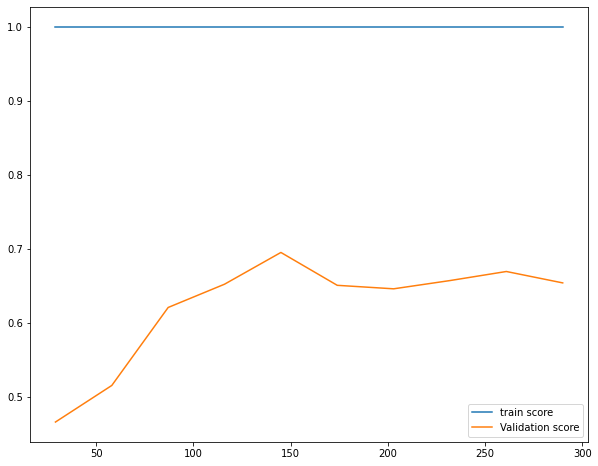

In [23]:
evaluation(model_A)

In [24]:
#Random Forest
model_B = make_pipeline(StandardScaler(), RandomForestClassifier())

[[89  8]
 [17 46]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        97
           1       0.85      0.73      0.79        63

    accuracy                           0.84       160
   macro avg       0.85      0.82      0.83       160
weighted avg       0.84      0.84      0.84       160



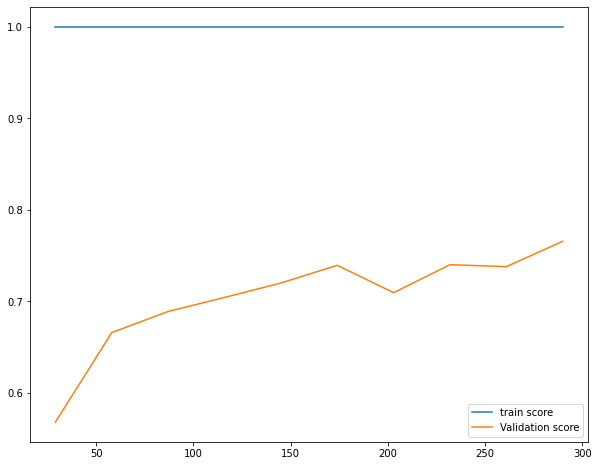

In [25]:
evaluation(model_B)